In [1]:
from livenote import LiveNote
from chroma import wav_to_chroma, wav_to_chroma_col
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ref = 'Songs/bso/bso_01.wav'
live = 'Songs/bso/bso_02.wav'
ref_seq = wav_to_chroma(ref)
live_seq = wav_to_chroma(live)

print "initializing livenote"
params = {'search_band_width': 50, 'max_run_count': 3}
debug_params = {'seq': False, 'all': False}
ln = LiveNote(ref_seq, params, debug_params)

print "calling insert"
for i in range(live_seq.shape[1]):
    cont = ln.insert(live_seq[:,i])
    if cont == "stop":
        break

initializing livenote
calling insert


In [3]:
print len(ln.path)

11354


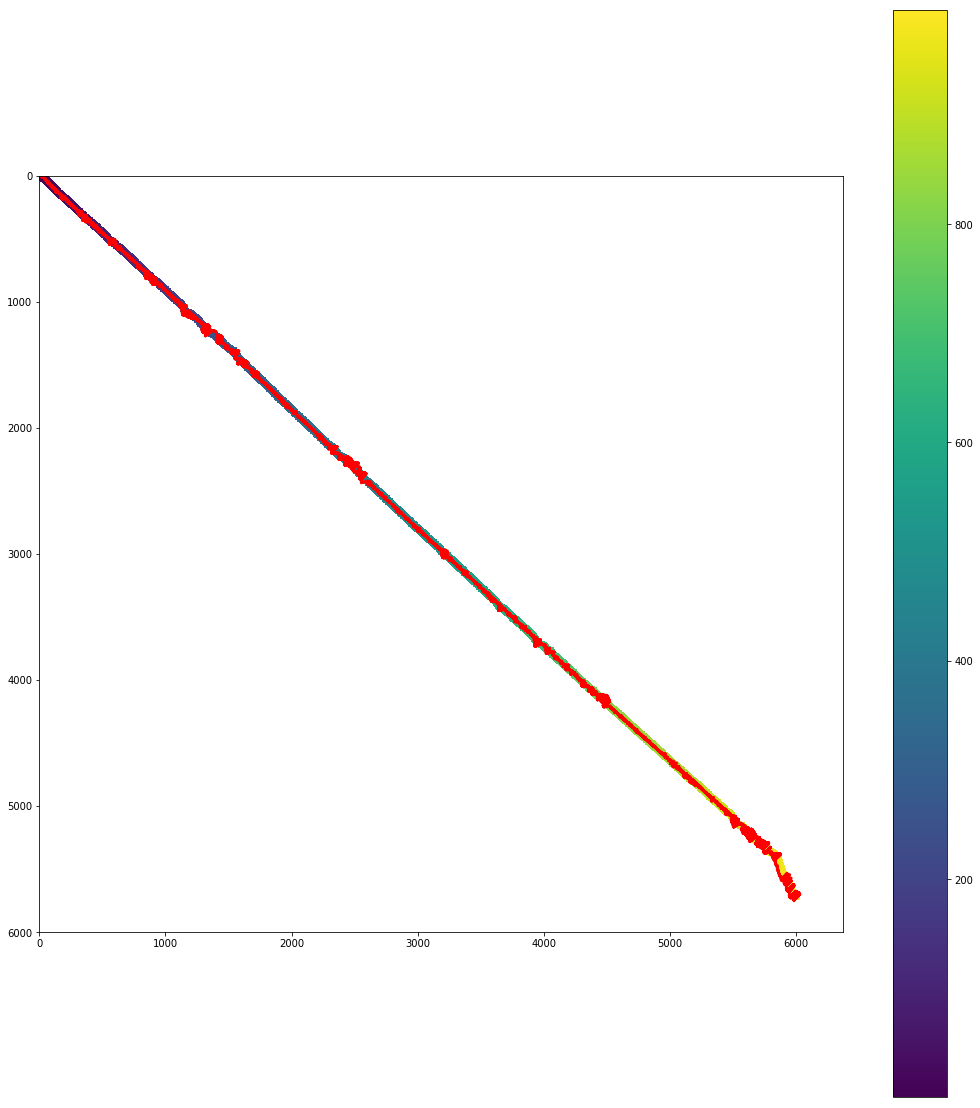

In [4]:
plt.figure(figsize=(18,20))
plt.imshow(ln.acc_cost[:6000, :])
plt.colorbar()
path = np.array(ln.path)
plt.plot(path[:,1], path[:,0], '-r', linewidth=3)
plt.show()

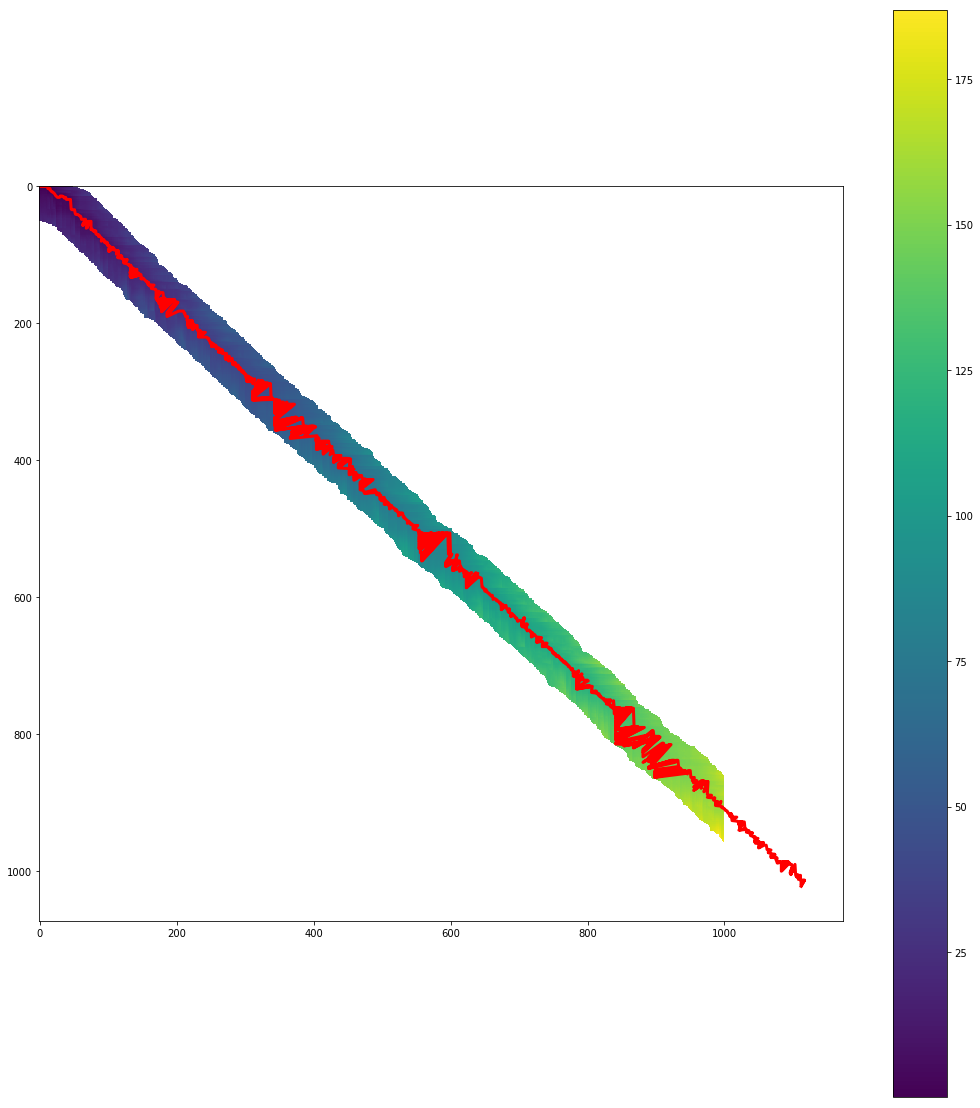

In [5]:
plt.figure(figsize=(18,20))
plt.imshow(ln.acc_cost[:1000, :1000])
plt.colorbar()
path = np.array(ln.path)
plt.plot(path[:,1][:2000], path[:,0][:2000], '-r', linewidth=3)
plt.show()

In [6]:
def lines_from_file(filename):
    f = open(filename)
    return f.readlines()

def tokens_from_line(line):
    return line.strip().split('\t')

def data_from_file(filename):
    path = []
    lines = lines_from_file(filename)
    tokens =  [tokens_from_line(line) for line in lines[5:]]
    for t in tokens:  # this is the format of one line (time, label) in the gems/barlines text files
        l, r = t[0].split(" ")[0], t[0].split(" ")[1]
        path.append((int(l), int(r)))
    return path

In [7]:
print ln.path

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (3, 12), (3, 13), (4, 14), (3, 15), (6, 16), (7, 17), (8, 18), (8, 19), (9, 20), (10, 21), (11, 22), (13, 23), (14, 24), (15, 25), (16, 26), (16, 27), (16, 28), (16, 29), (14, 30), (14, 31), (14, 32), (14, 33), (15, 34), (15, 35), (17, 36), (16, 37), (16, 38), (19, 39), (19, 40), (19, 41), (19, 42), (19, 43), (19, 44), (19, 45), (33, 46), (34, 47), (34, 48), (34, 49), (34, 50), (34, 51), (40, 52), (41, 53), (41, 53), (41, 54), (41, 55), (41, 56), (41, 56), (42, 57), (43, 58), (43, 59), (43, 59), (44, 60), (48, 61), (48, 62), (48, 62), (48, 63), (48, 64), (48, 65), (48, 65), (48, 66), (48, 67), (55, 63), (56, 63), (51, 68), (51, 69), (57, 63), (51, 70), (51, 71), (51, 72), (51, 73), (51, 73), (51, 74), (59, 68), (60, 70), (61, 68), (51, 75), (62, 75), (62, 76), (63, 75), (63, 77), (64, 78), (64, 79), (65, 78), (65, 80), (65, 81), (66, 80), (65, 82), (67, 82), (68, 82), (69, 82), (70, 83), (70, 83)

In [8]:
live_path = data_from_file("tests/bso_livenote_test_live.txt")
print live_path

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (1, 12), (1, 13), (1, 14), (1, 15), (3, 16), (3, 17), (5, 18), (5, 19), (7, 20), (8, 21), (9, 22), (10, 23), (10, 24), (12, 25), (13, 26), (14, 27), (15, 28), (10, 29), (10, 30), (10, 31), (10, 32), (10, 33), (12, 34), (13, 35), (13, 36), (13, 37), (13, 38), (13, 39), (13, 40), (13, 41), (20, 42), (20, 43), (20, 44), (20, 45), (31, 46), (31, 47), (32, 48), (31, 49), (31, 50), (31, 51), (31, 52), (38, 53), (38, 53), (38, 54), (39, 55), (39, 56), (39, 56), (39, 57), (39, 58), (39, 59), (39, 59), (45, 60), (46, 61), (46, 62), (46, 62), (46, 63), (47, 64), (47, 65), (47, 65), (47, 66), (47, 67), (55, 64), (47, 68), (49, 69), (49, 70), (49, 71), (49, 71), (49, 72), (49, 73), (57, 69), (49, 74), (58, 68), (59, 68), (60, 75), (60, 76), (60, 77), (61, 77), (62, 78), (62, 79), (63, 80), (64, 80), (63, 81), (63, 82), (65, 82), (66, 82), (67, 82), (68, 83), (68, 83), (68, 84), (68, 85), (69, 86), (70, 86), 

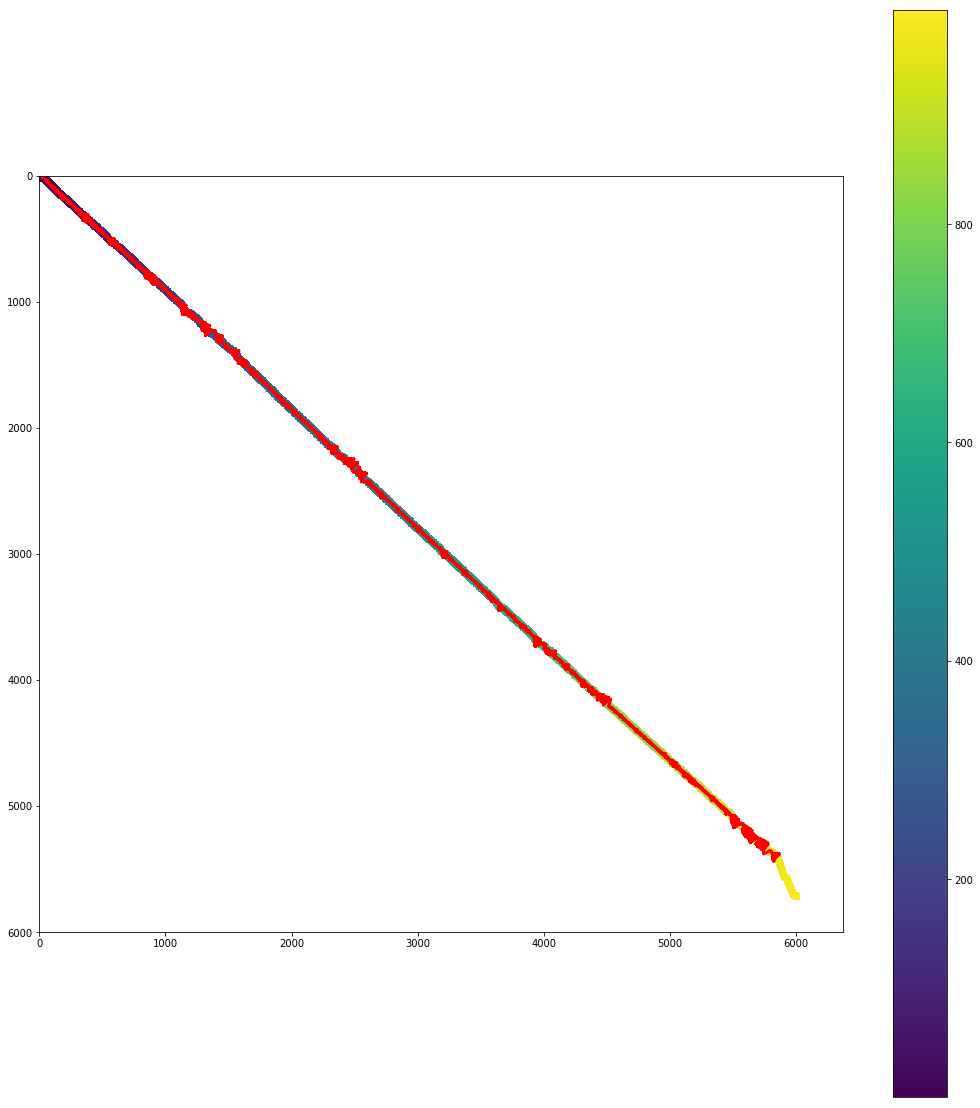

In [9]:
plt.figure(figsize=(18,20))
plt.imshow(ln.acc_cost[:6000, :])
plt.colorbar()
path = np.array(live_path)
plt.plot(path[:,1], path[:,0], '-r', linewidth=3)
plt.show()

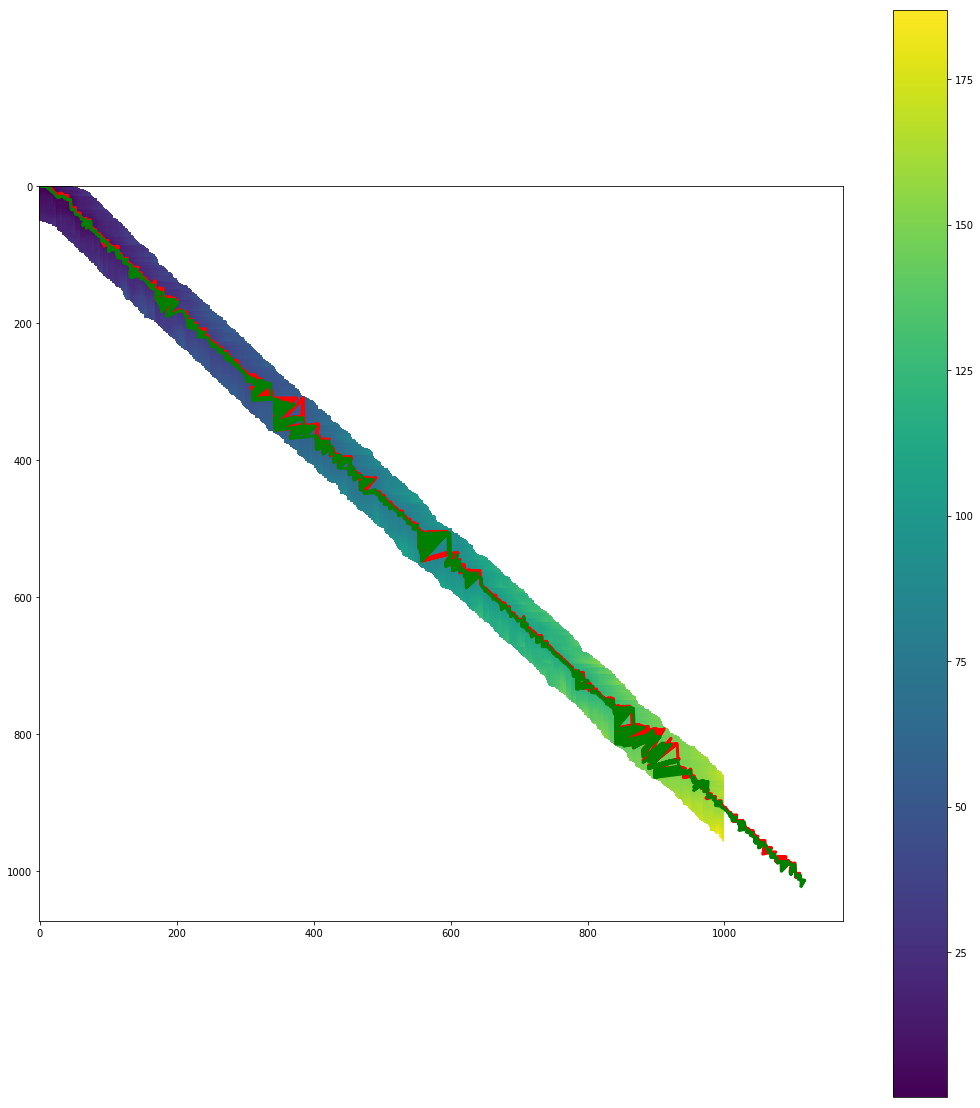

In [11]:
plt.figure(figsize=(18,20))
plt.imshow(ln.acc_cost[:1000, :1000])
plt.colorbar()
path = np.array(live_path)
path2 = np.array(ln.path)
plt.plot(path[:,1][:2000], path[:,0][:2000], '-r', linewidth=3)
plt.plot(path2[:,1][:2000], path2[:,0][:2000], '-g', linewidth=3)
plt.show()